# Plotting orbits of three objects using numerical methods

## Konstantinos Doran SN:22007700 Date:11/02/24

Introduction:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def force(r1,r2,m1,m2):
    """Returns the gravitational force on a mass, m1, at a point r1, due to another mass, m2, at a point r2.
    
    Inputs:
    r1      position of first mass as a numpy array
    r2      position of second mass as a numpy array
    m1      mass of first object
    m2      mass of second object    
    Returns:
    f_on_m1 force on mass 1 as a numpy array
    """
    # Find r_12 and its magnitude
    r12 = r2 - r1
    f_on_m1 = G*m1*m2/(np.sqrt((np.dot(r12,r12))**3))*r12
    return f_on_m1

In [3]:
# Set up number of steps, masses, timestep again (use new variable names)
G = 1        # Appropriate units
Ndim = 2     #2D problem for now
Nsteps_verlet = 300000
dt_verlet = 0.0001
m1_verlet = 1.0
m2_verlet = 3e-6
m3_verlet = 3e-8
r12 = 1
r23 = 0.0025
v2 = np.sqrt(G*m1_verlet*(r12-(m2_verlet*r12/(m1_verlet+m2_verlet))))/r12
v3 = v2- np.sqrt((G*m2_verlet*(r23-(m3_verlet*r23/(m2_verlet+m3_verlet)))))/r23
# Storage for positions, velocities etc (again, use new names)
r1_verlet = np.zeros((Nsteps_verlet,Ndim))
r2_verlet = np.zeros((Nsteps_verlet,Ndim))
r3_verlet = np.zeros((Nsteps_verlet,Ndim))
v1_verlet = np.zeros((Nsteps_verlet,Ndim))
v2_verlet = np.zeros((Nsteps_verlet,Ndim))
v3_verlet = np.zeros((Nsteps_verlet,Ndim))
# Set up storage for energies
u1_verlet = np.zeros((Nsteps_verlet))
u2_verlet = np.zeros((Nsteps_verlet))
u3_verlet = np.zeros((Nsteps_verlet))
k1_verlet = np.zeros((Nsteps_verlet))
k2_verlet = np.zeros((Nsteps_verlet))
k3_verlet = np.zeros((Nsteps_verlet))
totalE1_verlet = np.zeros((Nsteps_verlet))
totalE2_verlet = np.zeros((Nsteps_verlet))
totalE3_verlet = np.zeros((Nsteps_verlet))
# Initial conditions
r1_verlet[0,:] = np.array((0,0))
r2_verlet[0,:] = np.array((r12,0))
r3_verlet[0,:] = np.array((r12+r23,0))
v1_verlet[0,:] = np.array((0,0))
v2_verlet[0,:] = np.array((0,v2))
v3_verlet[0,:] = np.array((0,v3))
r12_verlet = r2_verlet[0,:] - r1_verlet[0,:]
r23_verlet = r3_verlet[0,:] - r2_verlet[0,:]
r13_verlet = r3_verlet[0,:] - r1_verlet[0,:]
u1_verlet[0] = -G*m1_verlet*(m2_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r13_verlet))
u2_verlet[0] = -G*m2_verlet*(m1_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r23_verlet))
u3_verlet[0] = -G*m3_verlet*(m1_verlet/np.linalg.norm(r13_verlet) + m2_verlet/np.linalg.norm(r23_verlet))
k1_verlet[0] = 0.5*m1_verlet*(np.dot(v1_verlet[0,:], v1_verlet[0,:]))
k2_verlet[0] = 0.5*m2_verlet*(np.dot(v2_verlet[0,:],v2_verlet[0,:]))
k3_verlet[0] = 0.5*m2_verlet*(np.dot(v3_verlet[0,:],v3_verlet[0,:]))
totalE1_verlet[0] = u1_verlet[0]+k1_verlet[0]
totalE2_verlet[0] = u2_verlet[0]+k2_verlet[0]
totalE3_verlet[0] = u3_verlet[0]+k3_verlet[0]

for i in range(Nsteps_verlet-1):
    # Find forces on masses at this timestep
    f12 = force(r1_verlet[i,:],r2_verlet[i,:],m1_verlet,m2_verlet)
    f13 = force(r1_verlet[i,:],r3_verlet[i,:],m1_verlet,m3_verlet)
    f23 = force(r2_verlet[i,:],r3_verlet[i,:],m2_verlet,m3_verlet)
    f21 = -f12
    f32 = -f23
    f31 = -f13
    f1 = f12 + f13
    f2 = f21 + f23
    f3 = f31 + f32
    # Update positions using velocity Verlet
    r1_verlet[i+1,:] = r1_verlet[i,:] + dt_verlet*v1_verlet[i,:] + (dt_verlet**2)*f1/(2*m1_verlet)
    r2_verlet[i+1,:] = r2_verlet[i,:] + dt_verlet*v2_verlet[i,:] + (dt_verlet**2)*f2/(2*m2_verlet)
    r3_verlet[i+1,:] = r3_verlet[i,:] + dt_verlet*v3_verlet[i,:] + (dt_verlet**2)*f2/(2*m3_verlet)
    # Find forces at new timestep (remember that you have to store previous forces)
    f12new = force(r1_verlet[i+1,:],r2_verlet[i+1,:],m1_verlet,m2_verlet)
    f13new = force(r1_verlet[i+1,:],r3_verlet[i+1,:],m1_verlet,m3_verlet)
    f23new = force(r2_verlet[i+1,:],r3_verlet[i+1,:],m2_verlet,m3_verlet)
    f21new = -f12new
    f32new = -f23new
    f31new = -f13new
    f1 = f12 + f13
    f2 = f21 + f23
    f3 = f31 + f32
    f1new = f12new + f13new
    f2new = f21new + f23new
    f3new = f31new + f32new
    v1_verlet[i+1,:] = v1_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m1_verlet)
    v2_verlet[i+1,:] = v2_verlet[i,:] + dt_verlet*(f2 + f2new)/(2*m2_verlet)
    v3_verlet[i+1,:] = v3_verlet[i,:] + dt_verlet*(f3 + f3new)/(2*m3_verlet)
    # Store energies
    r12_verlet = r2_verlet[i+1,:] - r1_verlet[i+1,:]
    r23_verlet = r3_verlet[i+1,:] - r2_verlet[i+1,:]
    r13_verlet = r3_verlet[i+1,:] - r1_verlet[i+1,:]
    u1_verlet[i+1] = -G*m1_verlet*(m2_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r13_verlet))
    u2_verlet[i+1] = -G*m2_verlet*(m1_verlet/np.linalg.norm(r12_verlet) + m3_verlet/np.linalg.norm(r23_verlet))
    u3_verlet[i+1] = -G*m3_verlet*(m1_verlet/np.linalg.norm(r13_verlet) + m2_verlet/np.linalg.norm(r23_verlet))
    k1_verlet[i+1] = 0.5*m1_verlet*(np.dot(v1_verlet[i+1,:],v1_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m2_verlet*(np.dot(v2_verlet[i+1,:],v2_verlet[i+1,:]))
    k2_verlet[i+1] = 0.5*m3_verlet*(np.dot(v3_verlet[i+1,:],v3_verlet[i+1,:]))
    totalE1_verlet[i+1] = u1_verlet[i+1]+k1_verlet[i+1]
    totalE2_verlet[i+1] = u2_verlet[i+1]+k2_verlet[i+1]
    totalE3_verlet[i+1] = u3_verlet[i+1]+k3_verlet[i+1]


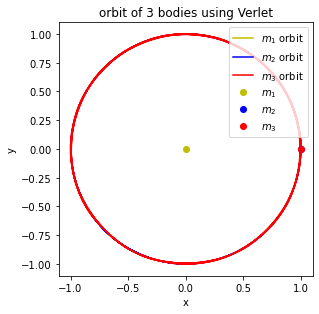

In [12]:

# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(10,10))
ax1 = fig3.add_subplot(1,2,1)
ax1.plot(r1_verlet[:,0],r1_verlet[:,1], label=r"$m_1$ orbit", color='y')
ax1.plot(r2_verlet[:,0],r2_verlet[:,1], label=r"$m_2$ orbit", color='b')
ax1.plot(r3_verlet[:,0],r3_verlet[:,1], label=r"$m_3$ orbit", color='r')
ax1.plot(r1_verlet[0,0],r1_verlet[0,1], "o", color='y',label=r"$m_1$")
ax1.plot(r2_verlet[0,0],r2_verlet[0,1], "o" , color='b', label=r"$m_2$")
ax1.plot(r3_verlet[0,0],r3_verlet[0,1], "o" , color='r', label=r"$m_3$")
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("orbit of 3 bodies using Verlet")
ax1.legend(loc="upper right")

# ax2 = fig3.add_subplot(1,3,2)
# ax2.plot(t_arr,r2_verlet[:,0], label="x")
# ax2.plot(t_arr,r2_verlet[:,1], label="y")
# ax2.set_xlabel("time")
# ax2.set_ylabel("position")
# ax2.set_title("Position of mass 2 with respect to time")
# ax2.legend()
# ax3 = fig3.add_subplot(1,3,3)
# ax3.plot(t_arr,r3_verlet[:,0], label="x")
# ax3.plot(t_arr,r3_verlet[:,1], label="y")
# ax3.set_xlabel("time")
# ax3.set_ylabel("position")
# ax3.set_title("Position of mass 3 with respect to time")
# ax3.legend()    

In [13]:
fig3.savefig("three body verlet orbit.pdf")

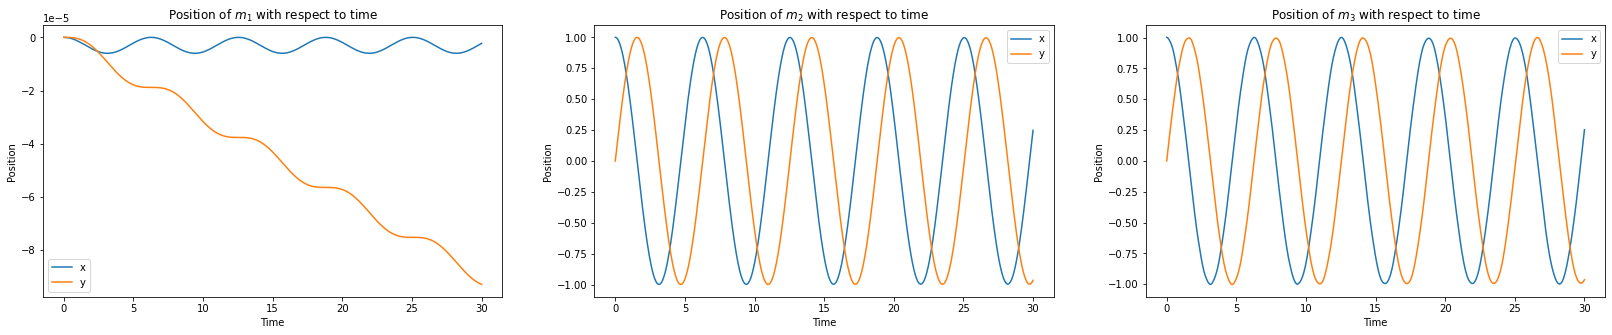

In [19]:
# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(28,5))
ax1 = fig3.add_subplot(1,3,1)
ax1.plot(t_arr,r1_verlet[:,0], label="x")
ax1.plot(t_arr,r1_verlet[:,1], label="y")
ax1.set_xlabel("Time")
ax1.set_ylabel("Position")
ax1.set_title("Position of $m_1$ with respect to time")
ax1.legend()

ax2 = fig3.add_subplot(1,3,2)
ax2.plot(t_arr,r2_verlet[:,0], label="x")
ax2.plot(t_arr,r2_verlet[:,1], label="y")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.set_title("Position of $m_2$ with respect to time")
ax2.legend()
ax3 = fig3.add_subplot(1,3,3)
ax3.plot(t_arr,r3_verlet[:,0], label="x")
ax3.plot(t_arr,r3_verlet[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("Position")
ax3.set_title("Position of $m_3$ with respect to time")
ax3.legend()    

In [20]:
fig3.savefig("three body verlet positions.pdf")

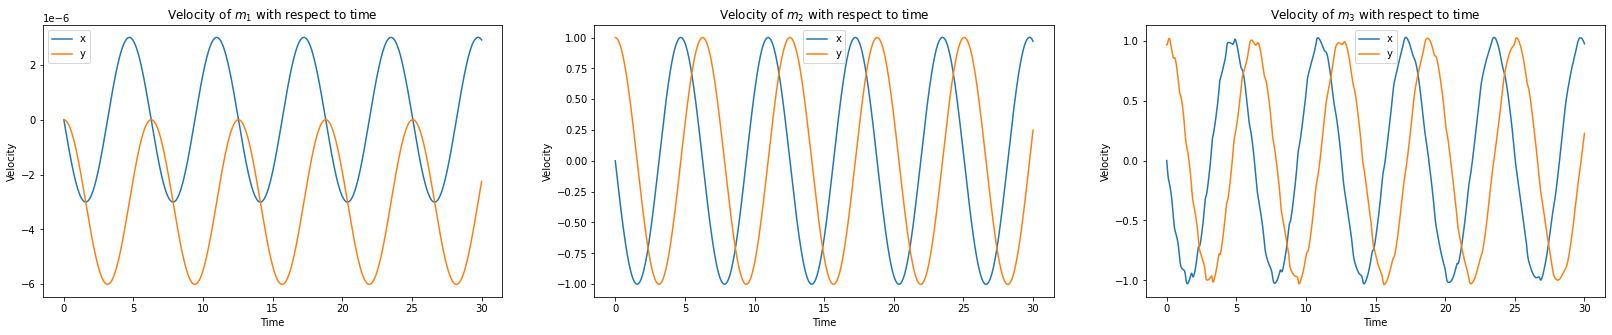

In [22]:
# Plot orbit, energies, angular momentum again
t_arr = np.linspace(0,Nsteps_verlet*dt_verlet,Nsteps_verlet)
fig3 = plt.figure(figsize=(28,5))
ax1 = fig3.add_subplot(1,3,1)
ax1.plot(t_arr,v1_verlet[:,0], label="x")
ax1.plot(t_arr,v1_verlet[:,1], label="y")
ax1.set_xlabel("Time")
ax1.set_ylabel("Velocity")
ax1.set_title("Velocity of $m_1$ with respect to time")
ax1.legend()

ax2 = fig3.add_subplot(1,3,2)
ax2.plot(t_arr,v2_verlet[:,0], label="x")
ax2.plot(t_arr,v2_verlet[:,1], label="y")
ax2.set_xlabel("Time")
ax2.set_ylabel("Velocity")
ax2.set_title("Velocity of $m_2$ with respect to time")
ax2.legend()
ax3 = fig3.add_subplot(1,3,3)
ax3.plot(t_arr,v3_verlet[:,0], label="x")
ax3.plot(t_arr,v3_verlet[:,1], label="y")
ax3.set_xlabel("Time")
ax3.set_ylabel("Velocity")
ax3.set_title("Velocity of $m_3$ with respect to time")
ax3.legend()    

In [23]:
fig3.savefig("three body verlet velocities.pdf")

Had an issue with stability of moon orbit however, after adjusting my time step this was resolved. Look at critical timestep for verlet method. Decreasing size of time step increased calculation time considerably though.

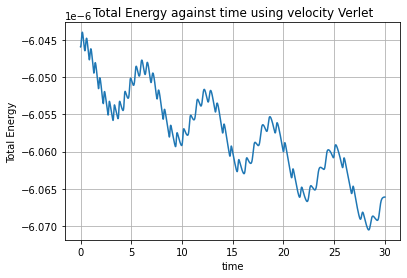

In [25]:
totalE_verlet = totalE1_verlet+totalE2_verlet + totalE3_verlet
plt.plot(t_arr[1:], totalE_verlet[1:])
plt.xlabel("time")
plt.ylabel("Total Energy")
plt.title("Total Energy against time using velocity Verlet")
plt.grid()

Interestingly, high initial energy. However, seems fairly consistent following. Below I replot the same data changing the y limit.


(-6.1e-06, -6e-06)

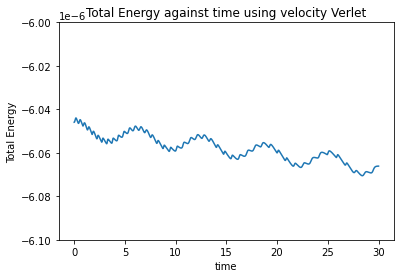

In [26]:
totalE_verlet = totalE1_verlet+totalE2_verlet + totalE3_verlet
plt.plot(t_arr[1:], totalE_verlet[1:])
plt.xlabel("time")
plt.ylabel("Total Energy")
plt.title("Total Energy against time using velocity Verlet")
plt.ylim(-6.1e-6,-6e-6)

Now looking at the total energy of the system, it is evident that it fluctuates similar to the two body system, which also fluctuates. Its evident that this method struggles to conserve energy with 3 bodies as the total energy is slowly decreasing over time and does not remain constant.

Text(0.5, 1.0, 'Total Angular momentum using velocity Verlet')

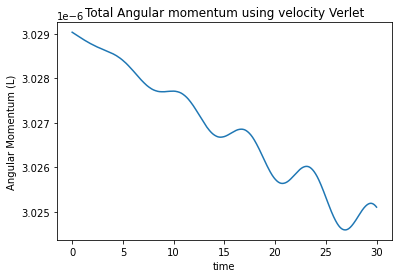

In [27]:
L1verlet = np.cross(r1_verlet, v1_verlet)*m1_verlet
L2verlet = np.cross(r2_verlet, v2_verlet)*m2_verlet
L3verlet = np.cross(r3_verlet,v3_verlet)*m3_verlet
TotalLverlet = L1verlet + L2verlet + L3verlet
plt.plot(t_arr,TotalLverlet)
plt.xlabel("time")
plt.ylabel("Angular Momentum (L)")
plt.title("Total Angular momentum using velocity Verlet")

The velocity verlet method clearly struggles with conserving angular momentum of 3 bodies

Text(1.0, 1.0, 'Total Potential Energy over time')

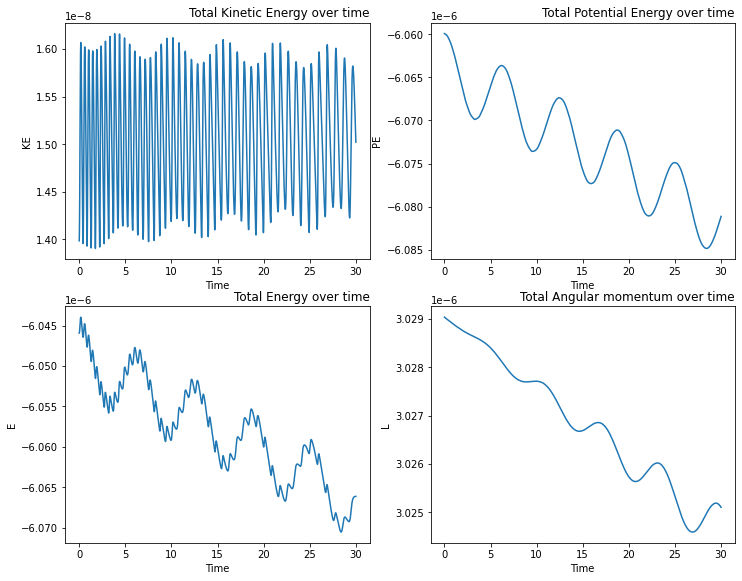

In [31]:
# Plot some kind of energy (calculate if necessary) vs t
fig2 = plt.figure(figsize=(12,20))
#fig2.tight_layout()
ax1 = fig2.add_subplot(4,2,3)
ax1.plot(t_arr[1:], totalE_verlet[1:])
ax1.set_xlabel("Time")
ax1.set_ylabel("E")
ax1.set_title("Total Energy over time", loc = "right")

# Plot angular momentum vs t
ax2 = fig2.add_subplot(4,2,4)
ax2.plot(t_arr,TotalLverlet)
ax2.set_xlabel("Time")
ax2.set_ylabel("L")
ax2.set_title("Total Angular momentum over time", loc = "right")

#plot KE vs t
ax3 = fig2.add_subplot(4,2,1)
ax3.plot(t_arr[1:], k1_verlet[1:]+k2_verlet[1:]+k3_verlet[1:])
ax3.set_xlabel("Time")
ax3.set_ylabel("KE")
ax3.set_title("Total Kinetic Energy over time", loc = "right")

#plot PE vs t
ax4 = fig2.add_subplot(4,2,2)
ax4.plot(t_arr, u1_verlet+u2_verlet+u3_verlet)
ax4.set_xlabel("Time")
ax4.set_ylabel("PE")
ax4.set_title("Total Potential Energy over time", loc = "right")

In [32]:
fig2.savefig("three body verlet energy and momentum.pdf")

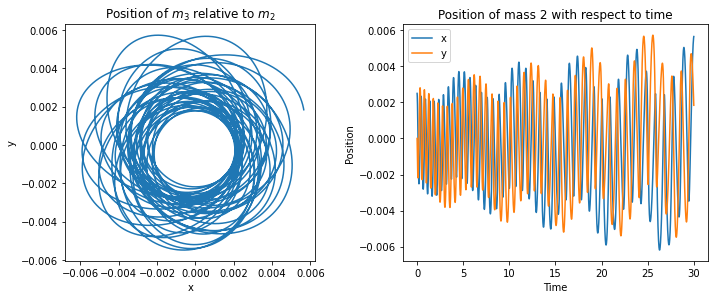

In [38]:
# Plot some kind of energy (calculate if necessary) vs t
fig2 = plt.figure(figsize=(12,20))
#fig2.tight_layout()
ax1 = fig2.add_subplot(4,2,3)
ax1.plot(r3_verlet[:,0]-r2_verlet[:,0], r3_verlet[:,1]-r2_verlet[:,1])
ax1.axis('scaled')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Position of $m_3$ relative to $m_2$")

# Plot angular momentum vs t
ax2 = fig2.add_subplot(4,2,4)
ax2.plot(t_arr,r3_verlet[:,0]-r2_verlet[:,0], label="x")
ax2.plot(t_arr,r3_verlet[:,1]-r2_verlet[:,1], label="y")
ax2.set_xlabel("Time")
ax2.set_ylabel("Position")
ax2.set_title("Position of mass 2 with respect to time")
ax2.legend()

In [40]:
fig2.savefig("Verlet relative m3 orbit.pdf")